In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [2]:
epl_15_16_matches = pd.read_csv('england-premier-league-matches-2015-to-2016-stats.csv')
epl_16_17_matches = pd.read_csv('england-premier-league-matches-2016-to-2017-stats.csv')
epl_17_18_matches = pd.read_csv('england-premier-league-matches-2017-to-2018-stats.csv')
epl_18_19_matches = pd.read_csv('england-premier-league-matches-2018-to-2019-stats.csv')
epl_19_20_matches = pd.read_csv('england-premier-league-matches-2019-to-2020-stats.csv')
epl_20_21_matches = pd.read_csv('england-premier-league-matches-2020-to-2021-stats.csv')
epl_21_22_matches = pd.read_csv('england-premier-league-matches-2021-to-2022-stats.csv')

In [3]:
epl_15_20_matches = pd.concat([epl_15_16_matches, epl_16_17_matches, 
                               epl_17_18_matches,epl_18_19_matches, epl_19_20_matches,
                               epl_20_21_matches], axis=0)

In [4]:
epl_15_20_matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2280 entries, 0 to 379
Data columns (total 64 columns):
timestamp                              2280 non-null int64
date_GMT                               2280 non-null object
status                                 2280 non-null object
attendance                             2167 non-null float64
home_team_name                         2280 non-null object
away_team_name                         2280 non-null object
referee                                1545 non-null object
Game Week                              2280 non-null int64
Pre-Match PPG (Home)                   2280 non-null float64
Pre-Match PPG (Away)                   2280 non-null float64
home_ppg                               2280 non-null float64
away_ppg                               2280 non-null float64
home_team_goal_count                   2280 non-null int64
away_team_goal_count                   2280 non-null int64
total_goal_count                       2280 non-null 

In [5]:
epl_15_16_teams = pd.read_csv('england-premier-league-teams-2015-to-2016-stats.csv')
epl_16_17_teams = pd.read_csv('england-premier-league-teams-2016-to-2017-stats.csv')
epl_17_18_teams = pd.read_csv('england-premier-league-teams-2017-to-2018-stats.csv')
epl_18_19_teams = pd.read_csv('england-premier-league-teams-2018-to-2019-stats.csv')
epl_19_20_teams = pd.read_csv('england-premier-league-teams-2019-to-2020-stats.csv')

In [6]:
epl_15_20_teams = pd.concat([epl_15_16_teams, epl_16_17_teams, 
                               epl_17_18_teams,epl_18_19_teams, epl_19_20_teams], axis=0)

In [7]:
epl_15_20_teams.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 19
Columns: 293 entries, team_name to over145_corners_percentage
dtypes: float64(36), int64(253), object(4)
memory usage: 229.7+ KB


In [8]:
epl_15_16_teams2 = pd.read_csv('england-premier-league-teams2-2015-to-2016-stats.csv')
epl_16_17_teams2 = pd.read_csv('england-premier-league-teams2-2016-to-2017-stats.csv')
epl_17_18_teams2 = pd.read_csv('england-premier-league-teams2-2017-to-2018-stats.csv')
epl_18_19_teams2 = pd.read_csv('england-premier-league-teams2-2018-to-2019-stats.csv')
epl_19_20_teams2 = pd.read_csv('england-premier-league-teams2-2019-to-2020-stats.csv')

In [9]:
epl_15_20_teams2 = pd.concat([epl_15_16_teams2, epl_16_17_teams2, 
                               epl_17_18_teams2,epl_18_19_teams2, epl_19_20_teams2], axis=0)

In [10]:
epl_15_20_teams2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 19
Columns: 442 entries, team_name to failed_to_score_2h_away
dtypes: float64(42), int64(396), object(4)
memory usage: 346.1+ KB


In [11]:
epl_15_20_matches[['Game Week','home_team_name','away_team_name','Pre-Match PPG (Home)','Pre-Match PPG (Away)']].head(5)

,Game Week,home_team_name,away_team_name,Pre-Match PPG (Home),Pre-Match PPG (Away)
0,1,Manchester United,Tottenham Hotspur,0.0,0.0
1,1,AFC Bournemouth,Aston Villa,0.0,0.0
2,1,Norwich City,Crystal Palace,0.0,0.0
3,1,Leicester City,Sunderland,0.0,0.0
4,1,Everton,Watford,0.0,0.0


In [12]:
epl_15_20_matches.reset_index(drop=True, inplace=True)

In [13]:
conditions = [
    (epl_15_20_matches['home_team_goal_count'] == epl_15_20_matches['away_team_goal_count']),
    (epl_15_20_matches['home_team_goal_count'] > epl_15_20_matches['away_team_goal_count']),
    (epl_15_20_matches['home_team_goal_count'] < epl_15_20_matches['away_team_goal_count'])
]

# create a list of the values we want to assign for each condition
values = ['D', 'H', 'A']
home_values = ['D','W','L']
away_values = ['D','L','W']
home_points = [1,3,0]
away_points = [1,0,3]
values2 = [0, 1, -1]

# create a 2 new columns for match results,
# numerical coulumn (0 => Draw, 1 => Home Win, -1 => Home Lose)
# text column (H => Home, D => Draw, A => Away)
epl_15_20_matches['match_result_txt'] = np.select(conditions, values)
epl_15_20_matches['match_result_num'] = np.select(conditions, values2)
epl_15_20_matches['match_home_result'] = np.select(conditions, home_values)
epl_15_20_matches['match_away_result'] = np.select(conditions, away_values)
epl_15_20_matches['home_points_result'] = np.select(conditions, home_points)
epl_15_20_matches['away_points_result'] = np.select(conditions, away_points)
epl_15_20_matches = pd.get_dummies(epl_15_20_matches, columns=['match_result_txt'], prefix="result")

epl_15_20_matches['match_result_txt'] = np.select(conditions, values)
epl_15_20_matches[['home_team_name','away_team_name','home_team_goal_count','away_team_goal_count','match_home_result','match_away_result','match_result_txt','home_points_result','away_points_result','result_H','result_A']].head(20)

,home_team_name,away_team_name,home_team_goal_count,away_team_goal_count,match_home_result,match_away_result,match_result_txt,home_points_result,away_points_result,result_H,result_A
0,Manchester United,Tottenham Hotspur,1,0,W,L,H,3,0,1,0
1,AFC Bournemouth,Aston Villa,0,1,L,W,A,0,3,0,1
2,Norwich City,Crystal Palace,1,3,L,W,A,0,3,0,1
3,Leicester City,Sunderland,4,2,W,L,H,3,0,1,0
4,Everton,Watford,2,2,D,D,D,1,1,0,0
5,Chelsea,Swansea City,2,2,D,D,D,1,1,0,0
6,Newcastle United,Southampton,2,2,D,D,D,1,1,0,0
7,Arsenal,West Ham United,0,2,L,W,A,0,3,0,1
8,Stoke City,Liverpool,0,1,L,W,A,0,3,0,1
9,West Bromwich Albion,Manchester City,0,3,L,W,A,0,3,0,1


Text(0.5, 1.0, 'Match Result')

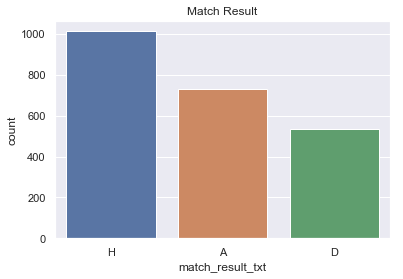

In [14]:
# A count plot to show that macthes mostly result with home wins
sns.set_theme(style="darkgrid")
sns.countplot(x="match_result_txt", data=epl_15_20_matches)
plt.title('Match Result')

In [15]:
# Extract year and month from kick off time => to generate season column
epl_15_20_matches['year'] = pd.DatetimeIndex(epl_15_20_matches['date_GMT']).year
epl_15_20_matches['month'] = pd.DatetimeIndex(epl_15_20_matches['date_GMT']).month

In [16]:
# Adding new columns to generate the corresponding seasons for each match
epl_15_20_matches['year_add'] = epl_15_20_matches['year'] + 1
epl_15_20_matches['year_minus'] = epl_15_20_matches['year'] - 1
epl_15_20_matches['slash'] = '/'
epl_15_20_matches['season_add'] = epl_15_20_matches['year'].astype(str) + epl_15_20_matches['slash'] +  epl_15_20_matches['year_add'].astype(str)
epl_15_20_matches['season_minus'] = epl_15_20_matches['year_minus'].astype(str) + epl_15_20_matches['slash'] +  epl_15_20_matches['year'].astype(str)

In [17]:
# Creating season based on the date of the match
epl_15_20_matches['season'] = np.where(epl_15_20_matches['month'] >= 8, 
                                       epl_15_20_matches['season_add'],
                                       epl_15_20_matches['season_minus'])

In [18]:
# Dropping the columns used for generating the season column
epl_15_20_matches.drop(['year_add','year_minus','slash','season_add','season_minus'], axis=1, inplace=True)

In [19]:
epl_15_20_matches[['year','month','season']].head()

,year,month,season
0,2015,8,2015/2016
1,2015,8,2015/2016
2,2015,8,2015/2016
3,2015,8,2015/2016
4,2015,8,2015/2016


In [20]:
epl_15_20_matches_head_home = epl_15_20_matches[['season','Game Week','home_team_name','away_team_name','result_H','result_A']]
epl_15_20_matches_head_away = epl_15_20_matches[['season','Game Week','away_team_name','home_team_name','result_A','result_H']]

epl_15_20_matches_head_home.rename(columns={"home_team_name": "home_team"}, inplace = True)
epl_15_20_matches_head_home.rename(columns={"away_team_name": "away_team"}, inplace = True)
epl_15_20_matches_head_home.rename(columns={"result_H": "result_home"}, inplace = True)
epl_15_20_matches_head_home.rename(columns={"result_A": "result_away"}, inplace = True)
epl_15_20_matches_head_away.rename(columns={"away_team_name": "home_team"}, inplace = True)
epl_15_20_matches_head_away.rename(columns={"home_team_name": "away_team"}, inplace = True)
epl_15_20_matches_head_away.rename(columns={"result_A": "result_home"}, inplace = True)
epl_15_20_matches_head_away.rename(columns={"result_H": "result_away"}, inplace = True)

epl_15_20_matches_head_total = pd.concat([epl_15_20_matches_head_home, epl_15_20_matches_head_away], axis=0)
epl_15_20_matches_head_total = epl_15_20_matches_head_total.sort_values(by=['season','Game Week'])

epl_15_20_matches_head_total['MP_Teams'] = epl_15_20_matches_head_total.groupby(['home_team','away_team']).cumcount()

epl_15_20_matches_head_total[['head_D','home_head','away_head','head_D2']] = epl_15_20_matches_head_total.groupby(['home_team','away_team']).transform(lambda x: x.shift().fillna(0).cumsum())
epl_15_20_matches_head_total.drop(['head_D','head_D2'], axis=1, inplace=True)

#epl_15_20_matches_head_total.to_csv('head.csv',index=False)

epl_15_20_matches_head_total.head(10)

c:\program files\python36\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,season,Game Week,home_team,away_team,result_home,result_away,MP_Teams,home_head,away_head
0,2015/2016,1,Manchester United,Tottenham Hotspur,1,0,0,0,0
1,2015/2016,1,AFC Bournemouth,Aston Villa,0,1,0,0,0
2,2015/2016,1,Norwich City,Crystal Palace,0,1,0,0,0
3,2015/2016,1,Leicester City,Sunderland,1,0,0,0,0
4,2015/2016,1,Everton,Watford,0,0,0,0,0
5,2015/2016,1,Chelsea,Swansea City,0,0,0,0,0
6,2015/2016,1,Newcastle United,Southampton,0,0,0,0,0
7,2015/2016,1,Arsenal,West Ham United,0,1,0,0,0
8,2015/2016,1,Stoke City,Liverpool,0,1,0,0,0
9,2015/2016,1,West Bromwich Albion,Manchester City,0,1,0,0,0


In [21]:
epl_15_20_matches_head_total.rename(columns={"home_team": "home_team_name"}, inplace = True)
epl_15_20_matches_head_total.rename(columns={"away_team": "away_team_name"}, inplace = True)

epl_15_20_matches_head_total = epl_15_20_matches_head_total[['season','Game Week','home_team_name','away_team_name',
                                                            'MP_Teams','home_head','away_head']]
epl_15_20_matches_home_join = epl_15_20_matches.merge(epl_15_20_matches_head_total, 
                                how='left',
                                on=['season','Game Week','home_team_name','away_team_name'])

epl_15_20_matches = epl_15_20_matches_home_join
epl_15_20_matches['head_diff'] = epl_15_20_matches['home_head'] - epl_15_20_matches['away_head']
epl_15_20_matches[['season','Game Week','home_team_name','away_team_name','MP_Teams','home_head','away_head']].head(5)

,season,Game Week,home_team_name,away_team_name,MP_Teams,home_head,away_head
0,2015/2016,1,Manchester United,Tottenham Hotspur,0,0,0
1,2015/2016,1,AFC Bournemouth,Aston Villa,0,0,0
2,2015/2016,1,Norwich City,Crystal Palace,0,0,0
3,2015/2016,1,Leicester City,Sunderland,0,0,0
4,2015/2016,1,Everton,Watford,0,0,0


In [22]:
epl_15_20_matches['home_vs_away_win_rate'] = epl_15_20_matches['home_head'].div(epl_15_20_matches['MP_Teams']).replace(np.inf, 0)
epl_15_20_matches['home_vs_away_lose_rate'] = epl_15_20_matches['away_head'].div(epl_15_20_matches['MP_Teams']).replace(np.inf, 0)

epl_15_20_matches['home_vs_away_win_rate'] = epl_15_20_matches['home_vs_away_win_rate'].fillna(0)
epl_15_20_matches['home_vs_away_lose_rate'] = epl_15_20_matches['home_vs_away_lose_rate'].fillna(0)

#epl_15_20_matches['home_vs_away_win_rate'] = epl_15_20_matches['home_vs_away_win_rate'] * 100
#epl_15_20_matches['home_vs_away_lose_rate'] = epl_15_20_matches['home_vs_away_lose_rate'] * 100

In [23]:
# Number of wins for each team in the past 5 years
# Number of loses for each team in the past 5 years 
# Number of draws for each team in the past 5 years
# Win Rate for each team
# Loss Rate for each team
# Draw Rate for each team

# A similar method will be used to calculate the goals difference for each team.
# Again there is no column indicating the the goals for and the goals against for each team 
# We will calculate those columns and will get the goal difference for each team before playing the match

epl_15_20_matches_played_home = epl_15_20_matches[['season','Game Week','home_team_name']]
epl_15_20_matches_played_away = epl_15_20_matches[['season','Game Week','away_team_name']]

epl_15_20_matches_played_home.rename(columns={"home_team_name": "team_name"}, inplace = True)
epl_15_20_matches_played_away.rename(columns={"away_team_name": "team_name"}, inplace = True)

epl_15_20_matches_played_total = pd.concat([epl_15_20_matches_played_home, epl_15_20_matches_played_away], axis=0)
epl_15_20_matches_played_total = epl_15_20_matches_played_total.sort_values(by=['season','team_name','Game Week'])

# MPBM (Matches Played Before Match)
epl_15_20_matches_played_total['MPTBM'] = epl_15_20_matches_played_total.groupby(['team_name']).cumcount()

epl_15_20_matches_played_total.head(5)

,season,Game Week,team_name,MPTBM
1,2015/2016,1,AFC Bournemouth,0
19,2015/2016,2,AFC Bournemouth,1
22,2015/2016,3,AFC Bournemouth,2
32,2015/2016,4,AFC Bournemouth,3
41,2015/2016,5,AFC Bournemouth,4


In [24]:
# For the method of calculating the matches played for home and away teams
# Dataframe is splitted into 2 datasets, home and away
# These 2 datasets are then merged with the main dataframe to generate 2 new columns
# representing the MPBM for home and away teams
epl_15_20_matches_home = epl_15_20_matches.merge(epl_15_20_matches_played_total,
                                                 left_on=['season','Game Week','home_team_name'], 
                                                 right_on = ['season','Game Week','team_name'])
epl_15_20_matches_home.rename(columns={"MPTBM": "MPTBM_H"}, inplace = True)
epl_15_20_matches_home = epl_15_20_matches_home[['season','Game Week','home_team_name','MPTBM_H']]

epl_15_20_matches_away = epl_15_20_matches.merge(epl_15_20_matches_played_total,
                                                 left_on=['season','Game Week','away_team_name'], 
                                                 right_on = ['season','Game Week','team_name'])
epl_15_20_matches_away.rename(columns={"MPTBM": "MPTBM_A"}, inplace = True)
epl_15_20_matches_away = epl_15_20_matches_away[['season','Game Week','away_team_name','MPTBM_A']]

epl_15_20_matches_home_join = epl_15_20_matches.merge(epl_15_20_matches_home, 
                                how='left',
                                on=['season','Game Week','home_team_name'])
epl_15_20_matches_home_join = epl_15_20_matches_home_join.merge(epl_15_20_matches_away, 
                        how='left',
                        on=['season','Game Week','away_team_name'])

epl_15_20_matches = epl_15_20_matches_home_join
epl_15_20_matches[['season','Game Week','home_team_name','away_team_name','MPTBM_H','MPTBM_A']].head(5)

,season,Game Week,home_team_name,away_team_name,MPTBM_H,MPTBM_A
0,2015/2016,1,Manchester United,Tottenham Hotspur,0,0
1,2015/2016,1,AFC Bournemouth,Aston Villa,0,0
2,2015/2016,1,Norwich City,Crystal Palace,0,0
3,2015/2016,1,Leicester City,Sunderland,0,0
4,2015/2016,1,Everton,Watford,0,0


In [25]:
# This part is to generate a column for the matches played for each team before the match
# On previous seasons there is no possibilty for the rows to have different value 
# This method is used to generate this column for future matches as there is a posibility that teams facing each other 
# may differ in their matches played

epl_15_20_matches_played_home = epl_15_20_matches[['season','Game Week','home_team_name']]
epl_15_20_matches_played_away = epl_15_20_matches[['season','Game Week','away_team_name']]

epl_15_20_matches_played_home.rename(columns={"home_team_name": "team_name"}, inplace = True)
epl_15_20_matches_played_away.rename(columns={"away_team_name": "team_name"}, inplace = True)

epl_15_20_matches_played_total = pd.concat([epl_15_20_matches_played_home, epl_15_20_matches_played_away], axis=0)
epl_15_20_matches_played_total = epl_15_20_matches_played_total.sort_values(by=['season','team_name','Game Week'])

# MPBM (Matches Played Before Match)
epl_15_20_matches_played_total['MPBM'] = epl_15_20_matches_played_total.groupby(['season','team_name']).cumcount()

epl_15_20_matches_played_total.head(5)

,season,Game Week,team_name,MPBM
1,2015/2016,1,AFC Bournemouth,0
19,2015/2016,2,AFC Bournemouth,1
22,2015/2016,3,AFC Bournemouth,2
32,2015/2016,4,AFC Bournemouth,3
41,2015/2016,5,AFC Bournemouth,4


In [26]:
# For the method of calculating the matches played for home and away teams
# Dataframe is splitted into 2 datasets, home and away
# These 2 datasets are then merged with the main dataframe to generate 2 new columns
# representing the MPBM for home and away teams
epl_15_20_matches_home = epl_15_20_matches.merge(epl_15_20_matches_played_total,
                                                 left_on=['season','Game Week','home_team_name'], 
                                                 right_on = ['season','Game Week','team_name'])
epl_15_20_matches_home.rename(columns={"MPBM": "MPBM_H"}, inplace = True)
epl_15_20_matches_home = epl_15_20_matches_home[['season','Game Week','home_team_name','MPBM_H']]

epl_15_20_matches_away = epl_15_20_matches.merge(epl_15_20_matches_played_total,
                                                 left_on=['season','Game Week','away_team_name'], 
                                                 right_on = ['season','Game Week','team_name'])
epl_15_20_matches_away.rename(columns={"MPBM": "MPBM_A"}, inplace = True)
epl_15_20_matches_away = epl_15_20_matches_away[['season','Game Week','away_team_name','MPBM_A']]

epl_15_20_matches_home_join = epl_15_20_matches.merge(epl_15_20_matches_home, 
                                how='left',
                                on=['season','Game Week','home_team_name'])
epl_15_20_matches_home_join = epl_15_20_matches_home_join.merge(epl_15_20_matches_away, 
                        how='left',
                        on=['season','Game Week','away_team_name'])

epl_15_20_matches = epl_15_20_matches_home_join
epl_15_20_matches[['season','Game Week','home_team_name','away_team_name','MPBM_H','MPBM_A']].head(20)

,season,Game Week,home_team_name,away_team_name,MPBM_H,MPBM_A
0,2015/2016,1,Manchester United,Tottenham Hotspur,0,0
1,2015/2016,1,AFC Bournemouth,Aston Villa,0,0
2,2015/2016,1,Norwich City,Crystal Palace,0,0
3,2015/2016,1,Leicester City,Sunderland,0,0
4,2015/2016,1,Everton,Watford,0,0
5,2015/2016,1,Chelsea,Swansea City,0,0
6,2015/2016,1,Newcastle United,Southampton,0,0
7,2015/2016,1,Arsenal,West Ham United,0,0
8,2015/2016,1,Stoke City,Liverpool,0,0
9,2015/2016,1,West Bromwich Albion,Manchester City,0,0


In [27]:
# Here is to show that the current datasets already has no row showing difference in matches between the home and away teams
epl_15_20_matches[epl_15_20_matches.MPBM_H != epl_15_20_matches.MPBM_A].head()

,timestamp,date_GMT,status,attendance,home_team_name,away_team_name,referee,Game Week,Pre-Match PPG (Home),Pre-Match PPG (Away),...,MP_Teams,home_head,away_head,head_diff,home_vs_away_win_rate,home_vs_away_lose_rate,MPTBM_H,MPTBM_A,MPBM_H,MPBM_A


In [28]:
epl_15_20_points_home = epl_15_20_matches[['season','Game Week','home_team_name','home_points_result']]
epl_15_20_points_away = epl_15_20_matches[['season','Game Week','away_team_name','away_points_result']]

epl_15_20_points_home.rename(columns={"home_team_name": "team_name"}, inplace = True)
epl_15_20_points_away.rename(columns={"away_team_name": "team_name"}, inplace = True)
epl_15_20_points_home.rename(columns={"home_points_result": "points_result"}, inplace = True)
epl_15_20_points_away.rename(columns={"away_points_result": "points_result"}, inplace = True)

epl_15_20_points_total = pd.concat([epl_15_20_points_home, epl_15_20_points_away], axis=0)
epl_15_20_points_total = epl_15_20_points_total.sort_values(by=['season','team_name','Game Week'])

# GSBM_FR (Goals Scored Before Match For) | GSBM_AG (Goals Scored Before Match Against)
epl_15_20_points_total[['points_result_D','points_result']] = epl_15_20_points_total.groupby(['season','team_name']).transform(lambda x: x.shift().fillna(0).cumsum())
epl_15_20_points_total.drop('points_result_D', axis=1, inplace=True)

epl_15_20_points_total.head(5)

,season,Game Week,team_name,points_result
1,2015/2016,1,AFC Bournemouth,0.0
19,2015/2016,2,AFC Bournemouth,0.0
22,2015/2016,3,AFC Bournemouth,0.0
32,2015/2016,4,AFC Bournemouth,3.0
41,2015/2016,5,AFC Bournemouth,4.0


In [29]:
epl_15_20_points_home = epl_15_20_matches.merge(epl_15_20_points_total, 
                                                 left_on=['season','Game Week','home_team_name'], 
                                                 right_on = ['season','Game Week','team_name'])
epl_15_20_points_home.rename(columns={"points_result": "points_H"}, inplace = True)

epl_15_20_points_home = epl_15_20_points_home[['season','Game Week','home_team_name','points_H']]

epl_15_20_points_away = epl_15_20_matches.merge(epl_15_20_points_total,
                                                 left_on=['season','Game Week','away_team_name'], 
                                                 right_on = ['season','Game Week','team_name'])
epl_15_20_points_away.rename(columns={"points_result": "points_A"}, inplace = True)
epl_15_20_points_away = epl_15_20_points_away[['season','Game Week','away_team_name','points_A']]

epl_15_20_points_home_join = epl_15_20_matches.merge(epl_15_20_points_home, 
                                how='left',
                                on=['season','Game Week','home_team_name'])
epl_15_20_points_home_join = epl_15_20_points_home_join.merge(epl_15_20_points_away, 
                        how='left',
                        on=['season','Game Week','away_team_name'])

epl_15_20_matches = epl_15_20_points_home_join

epl_15_20_matches['cum_points_diff'] = epl_15_20_matches['points_H'] - epl_15_20_matches['points_A']
epl_15_20_matches[['season','Game Week','home_team_name','away_team_name','points_H','points_A','cum_points_diff']].head(10)

,season,Game Week,home_team_name,away_team_name,points_H,points_A,cum_points_diff
0,2015/2016,1,Manchester United,Tottenham Hotspur,0.0,0.0,0.0
1,2015/2016,1,AFC Bournemouth,Aston Villa,0.0,0.0,0.0
2,2015/2016,1,Norwich City,Crystal Palace,0.0,0.0,0.0
3,2015/2016,1,Leicester City,Sunderland,0.0,0.0,0.0
4,2015/2016,1,Everton,Watford,0.0,0.0,0.0
5,2015/2016,1,Chelsea,Swansea City,0.0,0.0,0.0
6,2015/2016,1,Newcastle United,Southampton,0.0,0.0,0.0
7,2015/2016,1,Arsenal,West Ham United,0.0,0.0,0.0
8,2015/2016,1,Stoke City,Liverpool,0.0,0.0,0.0
9,2015/2016,1,West Bromwich Albion,Manchester City,0.0,0.0,0.0


In [30]:
# There is no column for the current points of each team before the match
# There is a column for the average points collected from matches played
# We will use our newly created columns to multiply the average points to retrievw the actual points for each team
# A column will be generated as points difference between each team having the home - away points
# This is our first main feature for the prediction model
epl_15_20_matches['PBM_H'] = epl_15_20_matches['Pre-Match PPG (Home)'] * epl_15_20_matches['MPBM_H']
epl_15_20_matches['PBM_A'] = epl_15_20_matches['Pre-Match PPG (Away)'] * epl_15_20_matches['MPBM_A']

epl_15_20_matches['points_diff'] = epl_15_20_matches['PBM_H'] - epl_15_20_matches['PBM_A']
epl_15_20_matches[['season','Game Week','home_team_name','away_team_name','match_result_txt','MPBM_H','Pre-Match PPG (Home)','PBM_H','MPBM_A','Pre-Match PPG (Away)','PBM_A','points_diff']].head(5)

,season,Game Week,home_team_name,away_team_name,match_result_txt,MPBM_H,Pre-Match PPG (Home),PBM_H,MPBM_A,Pre-Match PPG (Away),PBM_A,points_diff
0,2015/2016,1,Manchester United,Tottenham Hotspur,H,0,0.0,0.0,0,0.0,0.0,0.0
1,2015/2016,1,AFC Bournemouth,Aston Villa,A,0,0.0,0.0,0,0.0,0.0,0.0
2,2015/2016,1,Norwich City,Crystal Palace,A,0,0.0,0.0,0,0.0,0.0,0.0
3,2015/2016,1,Leicester City,Sunderland,H,0,0.0,0.0,0,0.0,0.0,0.0
4,2015/2016,1,Everton,Watford,D,0,0.0,0.0,0,0.0,0.0,0.0


In [31]:
# A similar method will be used to calculate the goals difference for each team.
# Again there is no column indicating the the goals for and the goals against for each team 
# We will calculate those columns and will get the goal difference for each team before playing the match
epl_15_20_matches_goals_home = epl_15_20_matches[['season','Game Week','home_team_name','home_team_goal_count','away_team_goal_count']]
epl_15_20_matches_goals_away = epl_15_20_matches[['season','Game Week','away_team_name','away_team_goal_count','home_team_goal_count']]

epl_15_20_matches_goals_home.rename(columns={"home_team_name": "team_name"}, inplace = True)
epl_15_20_matches_goals_away.rename(columns={"away_team_name": "team_name"}, inplace = True)
epl_15_20_matches_goals_home.rename(columns={"home_team_goal_count": "team_goals_for"}, inplace = True)
epl_15_20_matches_goals_away.rename(columns={"away_team_goal_count": "team_goals_for"}, inplace = True)
epl_15_20_matches_goals_home.rename(columns={"away_team_goal_count": "team_goals_against"}, inplace = True)
epl_15_20_matches_goals_away.rename(columns={"home_team_goal_count": "team_goals_against"}, inplace = True)

epl_15_20_matches_goals_total = pd.concat([epl_15_20_matches_goals_home, epl_15_20_matches_goals_away], axis=0)
epl_15_20_matches_goals_total = epl_15_20_matches_goals_total.sort_values(by=['season','team_name','Game Week'])

# GSBM_FR (Goals Scored Before Match For) | GSBM_AG (Goals Scored Before Match Against)
epl_15_20_matches_goals_total[['GSBM_D','GSBM_FR','GSBM_AG']] = epl_15_20_matches_goals_total.groupby(['season','team_name']).transform(lambda x: x.shift().fillna(0).cumsum())
epl_15_20_matches_goals_total.drop('GSBM_D', axis=1, inplace=True)

epl_15_20_matches_goals_total.head(5)

,season,Game Week,team_name,team_goals_for,team_goals_against,GSBM_FR,GSBM_AG
1,2015/2016,1,AFC Bournemouth,0,1,0.0,0.0
19,2015/2016,2,AFC Bournemouth,0,1,0.0,1.0
22,2015/2016,3,AFC Bournemouth,4,3,0.0,2.0
32,2015/2016,4,AFC Bournemouth,1,1,4.0,5.0
41,2015/2016,5,AFC Bournemouth,1,3,5.0,6.0


In [32]:
# For the method of calculating the goals for and against for home and away teams
# Dataframe is splitted into 2 datasets, home and away
# These 2 datasets are then merged with the main dataframe to generate 2 new columns
# representing the GSBM_FR, GSBM_AG for home and away teams
epl_15_20_goals_home = epl_15_20_matches.merge(epl_15_20_matches_goals_total, 
                                                 left_on=['season','Game Week','home_team_name'], 
                                                 right_on = ['season','Game Week','team_name'])
epl_15_20_goals_home.rename(columns={"GSBM_FR": "GSBM_H_FR"}, inplace = True)
epl_15_20_goals_home.rename(columns={"GSBM_AG": "GSBM_H_AG"}, inplace = True)

epl_15_20_goals_home = epl_15_20_goals_home[['season','Game Week','home_team_name','GSBM_H_FR','GSBM_H_AG']]

epl_15_20_goals_away = epl_15_20_matches.merge(epl_15_20_matches_goals_total,
                                                 left_on=['season','Game Week','away_team_name'], 
                                                 right_on = ['season','Game Week','team_name'])
epl_15_20_goals_away.rename(columns={"GSBM_FR": "GSBM_A_FR"}, inplace = True)
epl_15_20_goals_away.rename(columns={"GSBM_AG": "GSBM_A_AG"}, inplace = True)
epl_15_20_goals_away = epl_15_20_goals_away[['season','Game Week','away_team_name','GSBM_A_FR','GSBM_A_AG']]

epl_15_20_goals_home_join = epl_15_20_matches.merge(epl_15_20_goals_home, 
                                how='left',
                                on=['season','Game Week','home_team_name'])
epl_15_20_goals_home_join = epl_15_20_goals_home_join.merge(epl_15_20_goals_away, 
                        how='left',
                        on=['season','Game Week','away_team_name'])

epl_15_20_matches = epl_15_20_goals_home_join
epl_15_20_matches[['season','Game Week','home_team_name','away_team_name','GSBM_H_FR','GSBM_H_AG','GSBM_A_FR','GSBM_A_AG']].head(5)

,season,Game Week,home_team_name,away_team_name,GSBM_H_FR,GSBM_H_AG,GSBM_A_FR,GSBM_A_AG
0,2015/2016,1,Manchester United,Tottenham Hotspur,0.0,0.0,0.0,0.0
1,2015/2016,1,AFC Bournemouth,Aston Villa,0.0,0.0,0.0,0.0
2,2015/2016,1,Norwich City,Crystal Palace,0.0,0.0,0.0,0.0
3,2015/2016,1,Leicester City,Sunderland,0.0,0.0,0.0,0.0
4,2015/2016,1,Everton,Watford,0.0,0.0,0.0,0.0


In [33]:
# GDBM (Goals Difference Before Match)
epl_15_20_matches['GDBM_H'] = epl_15_20_matches['GSBM_H_FR'] - epl_15_20_matches['GSBM_H_AG']
epl_15_20_matches['GDBM_A'] = epl_15_20_matches['GSBM_A_FR'] - epl_15_20_matches['GSBM_A_AG']

# Goals difference between both home and away teams' goal difference
epl_15_20_matches['goals_diff'] = epl_15_20_matches['GDBM_H'] - epl_15_20_matches['GDBM_A']

In [34]:
epl_15_20_matches['home_team_shots_on_target'].head()

0    2
1    3
2    6
3    7
4    5
Name: home_team_shots_on_target, dtype: int64

In [35]:
# A similar method will be used to calculate the goals difference for each team.
# Again there is no column indicating the the goals for and the goals against for each team 
# We will calculate those columns and will get the goal difference for each team before playing the match
epl_15_20_shots_on_home = epl_15_20_matches[['season','Game Week','home_team_name','home_team_shots_on_target']]
epl_15_20_shots_on_away = epl_15_20_matches[['season','Game Week','away_team_name','away_team_shots_on_target']]

epl_15_20_shots_on_home.rename(columns={"home_team_name": "team_name"}, inplace = True)
epl_15_20_shots_on_away.rename(columns={"away_team_name": "team_name"}, inplace = True)
epl_15_20_shots_on_home.rename(columns={"home_team_shots_on_target": "shots_on"}, inplace = True)
epl_15_20_shots_on_away.rename(columns={"away_team_shots_on_target": "shots_on"}, inplace = True)

epl_15_20_shots_on_total = pd.concat([epl_15_20_shots_on_home, epl_15_20_shots_on_away], axis=0)
epl_15_20_shots_on_total = epl_15_20_shots_on_total.sort_values(by=['season','team_name','Game Week'])

# GSBM_FR (Goals Scored Before Match For) | GSBM_AG (Goals Scored Before Match Against)
epl_15_20_shots_on_total[['SOTBM_D','SOTBM']] = epl_15_20_shots_on_total.groupby(['season','team_name']).transform(lambda x: x.shift().fillna(0).cumsum())
epl_15_20_shots_on_total.drop('SOTBM_D', axis=1, inplace=True)

epl_15_20_shots_on_total.head(5)

,season,Game Week,team_name,shots_on,SOTBM
1,2015/2016,1,AFC Bournemouth,3,0.0
19,2015/2016,2,AFC Bournemouth,4,3.0
22,2015/2016,3,AFC Bournemouth,5,7.0
32,2015/2016,4,AFC Bournemouth,2,12.0
41,2015/2016,5,AFC Bournemouth,0,14.0


In [36]:
# For the method of calculating the goals for and against for home and away teams
# Dataframe is splitted into 2 datasets, home and away
# These 2 datasets are then merged with the main dataframe to generate 2 new columns
# representing the GSBM_FR, GSBM_AG for home and away teams
epl_15_20_shots_home = epl_15_20_matches.merge(epl_15_20_shots_on_total, 
                                                 left_on=['season','Game Week','home_team_name'], 
                                                 right_on = ['season','Game Week','team_name'])
epl_15_20_shots_home.rename(columns={"SOTBM": "SOTBM_H"}, inplace = True)

epl_15_20_shots_home = epl_15_20_shots_home[['season','Game Week','home_team_name','SOTBM_H']]

epl_15_20_shots_away = epl_15_20_matches.merge(epl_15_20_shots_on_total,
                                                 left_on=['season','Game Week','away_team_name'], 
                                                 right_on = ['season','Game Week','team_name'])
epl_15_20_shots_away.rename(columns={"SOTBM": "SOTBM_A"}, inplace = True)
epl_15_20_shots_away = epl_15_20_shots_away[['season','Game Week','away_team_name','SOTBM_A']]

epl_15_20_shots_home_join = epl_15_20_matches.merge(epl_15_20_shots_home, 
                                how='left',
                                on=['season','Game Week','home_team_name'])
epl_15_20_shots_home_join = epl_15_20_shots_home_join.merge(epl_15_20_shots_away, 
                        how='left',
                        on=['season','Game Week','away_team_name'])

epl_15_20_matches = epl_15_20_shots_home_join
epl_15_20_matches[['season','Game Week','home_team_name','away_team_name','SOTBM_H','SOTBM_A']].head(5)

,season,Game Week,home_team_name,away_team_name,SOTBM_H,SOTBM_A
0,2015/2016,1,Manchester United,Tottenham Hotspur,0.0,0.0
1,2015/2016,1,AFC Bournemouth,Aston Villa,0.0,0.0
2,2015/2016,1,Norwich City,Crystal Palace,0.0,0.0
3,2015/2016,1,Leicester City,Sunderland,0.0,0.0
4,2015/2016,1,Everton,Watford,0.0,0.0


In [37]:
# Redcards difference between both home and away teams' redcard difference
epl_15_20_matches['shots_on_diff'] = epl_15_20_matches['SOTBM_H'] - epl_15_20_matches['SOTBM_A']

In [38]:
# A similar method will be used to calculate the goals difference for each team.
# Again there is no column indicating the the goals for and the goals against for each team 
# We will calculate those columns and will get the goal difference for each team before playing the match
epl_15_20_poss_home = epl_15_20_matches[['season','Game Week','home_team_name','home_team_possession']]
epl_15_20_poss_away = epl_15_20_matches[['season','Game Week','away_team_name','away_team_possession']]

epl_15_20_poss_home.rename(columns={"home_team_name": "team_name"}, inplace = True)
epl_15_20_poss_away.rename(columns={"away_team_name": "team_name"}, inplace = True)
epl_15_20_poss_home.rename(columns={"home_team_possession": "poss"}, inplace = True)
epl_15_20_poss_away.rename(columns={"away_team_possession": "poss"}, inplace = True)

epl_15_20_poss_total = pd.concat([epl_15_20_poss_home, epl_15_20_poss_away], axis=0)
epl_15_20_poss_total = epl_15_20_poss_total.sort_values(by=['season','team_name','Game Week'])

# GSBM_FR (Goals Scored Before Match For) | GSBM_AG (Goals Scored Before Match Against)
epl_15_20_poss_total[['POSSBM_D','POSSBM']] = epl_15_20_poss_total.groupby(['season','team_name']).transform(lambda x: x.shift().fillna(0).cumsum())
epl_15_20_poss_total.drop('POSSBM_D', axis=1, inplace=True)

epl_15_20_poss_total.head(5)

,season,Game Week,team_name,poss,POSSBM
1,2015/2016,1,AFC Bournemouth,59,0.0
19,2015/2016,2,AFC Bournemouth,48,59.0
22,2015/2016,3,AFC Bournemouth,57,107.0
32,2015/2016,4,AFC Bournemouth,49,164.0
41,2015/2016,5,AFC Bournemouth,51,213.0


In [39]:
# For the method of calculating the goals for and against for home and away teams
# Dataframe is splitted into 2 datasets, home and away
# These 2 datasets are then merged with the main dataframe to generate 2 new columns
# representing the GSBM_FR, GSBM_AG for home and away teams
epl_15_20_poss_home = epl_15_20_matches.merge(epl_15_20_poss_total, 
                                                 left_on=['season','Game Week','home_team_name'], 
                                                 right_on = ['season','Game Week','team_name'])
epl_15_20_poss_home.rename(columns={"POSSBM": "POSSBM_H"}, inplace = True)

epl_15_20_poss_home = epl_15_20_poss_home[['season','Game Week','home_team_name','POSSBM_H']]

epl_15_20_poss_away = epl_15_20_matches.merge(epl_15_20_poss_total,
                                                 left_on=['season','Game Week','away_team_name'], 
                                                 right_on = ['season','Game Week','team_name'])
epl_15_20_poss_away.rename(columns={"POSSBM": "POSSBM_A"}, inplace = True)
epl_15_20_poss_away = epl_15_20_poss_away[['season','Game Week','away_team_name','POSSBM_A']]

epl_15_20_poss_home_join = epl_15_20_matches.merge(epl_15_20_poss_home, 
                                how='left',
                                on=['season','Game Week','home_team_name'])
epl_15_20_poss_home_join = epl_15_20_poss_home_join.merge(epl_15_20_poss_away, 
                        how='left',
                        on=['season','Game Week','away_team_name'])

epl_15_20_matches = epl_15_20_poss_home_join
epl_15_20_matches['POSSBM_H'] = epl_15_20_matches['POSSBM_H'] / epl_15_20_matches['MPBM_H']
epl_15_20_matches['POSSBM_A'] = epl_15_20_matches['POSSBM_A'] / epl_15_20_matches['MPBM_A']
epl_15_20_matches['POSSBM_H'] = epl_15_20_matches['POSSBM_H'].fillna(0)
epl_15_20_matches['POSSBM_A'] = epl_15_20_matches['POSSBM_A'].fillna(0)

epl_15_20_matches[['season','Game Week','home_team_name','away_team_name','POSSBM_H','POSSBM_A']].head(10)

,season,Game Week,home_team_name,away_team_name,POSSBM_H,POSSBM_A
0,2015/2016,1,Manchester United,Tottenham Hotspur,0.0,0.0
1,2015/2016,1,AFC Bournemouth,Aston Villa,0.0,0.0
2,2015/2016,1,Norwich City,Crystal Palace,0.0,0.0
3,2015/2016,1,Leicester City,Sunderland,0.0,0.0
4,2015/2016,1,Everton,Watford,0.0,0.0
5,2015/2016,1,Chelsea,Swansea City,0.0,0.0
6,2015/2016,1,Newcastle United,Southampton,0.0,0.0
7,2015/2016,1,Arsenal,West Ham United,0.0,0.0
8,2015/2016,1,Stoke City,Liverpool,0.0,0.0
9,2015/2016,1,West Bromwich Albion,Manchester City,0.0,0.0


In [40]:
epl_15_20_matches['poss_diff'] = epl_15_20_matches['POSSBM_H'] - epl_15_20_matches['POSSBM_A']

In [41]:
# A similar method will be used to calculate the goals difference for each team.
# Again there is no column indicating the the goals for and the goals against for each team 
# We will calculate those columns and will get the goal difference for each team before playing the match
epl_15_20_xg_home = epl_15_20_matches[['season','Game Week','home_team_name','team_a_xg']]
epl_15_20_xg_away = epl_15_20_matches[['season','Game Week','away_team_name','team_b_xg']]

epl_15_20_xg_home.rename(columns={"home_team_name": "team_name"}, inplace = True)
epl_15_20_xg_away.rename(columns={"away_team_name": "team_name"}, inplace = True)
epl_15_20_xg_home.rename(columns={"team_a_xg": "xg"}, inplace = True)
epl_15_20_xg_away.rename(columns={"team_b_xg": "xg"}, inplace = True)

epl_15_20_xg_total = pd.concat([epl_15_20_xg_home, epl_15_20_xg_away], axis=0)
epl_15_20_xg_total = epl_15_20_xg_total.sort_values(by=['season','team_name','Game Week'])

# GSBM_FR (Goals Scored Before Match For) | GSBM_AG (Goals Scored Before Match Against)
epl_15_20_xg_total[['XGBM_D','XGBM']] = epl_15_20_xg_total.groupby(['season','team_name']).transform(lambda x: x.shift().fillna(0).cumsum())
epl_15_20_xg_total.drop('XGBM_D', axis=1, inplace=True)

epl_15_20_xg_total.head(5)

,season,Game Week,team_name,xg,XGBM
1,2015/2016,1,AFC Bournemouth,0.0,0.0
19,2015/2016,2,AFC Bournemouth,0.0,0.0
22,2015/2016,3,AFC Bournemouth,0.0,0.0
32,2015/2016,4,AFC Bournemouth,0.0,0.0
41,2015/2016,5,AFC Bournemouth,0.0,0.0


In [42]:
# For the method of calculating the goals for and against for home and away teams
# Dataframe is splitted into 2 datasets, home and away
# These 2 datasets are then merged with the main dataframe to generate 2 new columns
# representing the GSBM_FR, GSBM_AG for home and away teams
epl_15_20_xgs_home = epl_15_20_matches.merge(epl_15_20_xg_total, 
                                                 left_on=['season','Game Week','home_team_name'], 
                                                 right_on = ['season','Game Week','team_name'])
epl_15_20_xgs_home.rename(columns={"XGBM": "XGBM_H"}, inplace = True)

epl_15_20_xgs_home = epl_15_20_xgs_home[['season','Game Week','home_team_name','XGBM_H']]

epl_15_20_xgs_away = epl_15_20_matches.merge(epl_15_20_xg_total,
                                                 left_on=['season','Game Week','away_team_name'], 
                                                 right_on = ['season','Game Week','team_name'])
epl_15_20_xgs_away.rename(columns={"XGBM": "XGBM_A"}, inplace = True)
epl_15_20_xgs_away = epl_15_20_xgs_away[['season','Game Week','away_team_name','XGBM_A']]

epl_15_20_xgs_home_join = epl_15_20_matches.merge(epl_15_20_xgs_home, 
                                how='left',
                                on=['season','Game Week','home_team_name'])
epl_15_20_xgs_home_join = epl_15_20_xgs_home_join.merge(epl_15_20_xgs_away, 
                        how='left',
                        on=['season','Game Week','away_team_name'])

epl_15_20_matches = epl_15_20_xgs_home_join

epl_15_20_matches[['season','Game Week','home_team_name','away_team_name','XGBM_H','XGBM_A']].head(10)

,season,Game Week,home_team_name,away_team_name,XGBM_H,XGBM_A
0,2015/2016,1,Manchester United,Tottenham Hotspur,0.0,0.0
1,2015/2016,1,AFC Bournemouth,Aston Villa,0.0,0.0
2,2015/2016,1,Norwich City,Crystal Palace,0.0,0.0
3,2015/2016,1,Leicester City,Sunderland,0.0,0.0
4,2015/2016,1,Everton,Watford,0.0,0.0
5,2015/2016,1,Chelsea,Swansea City,0.0,0.0
6,2015/2016,1,Newcastle United,Southampton,0.0,0.0
7,2015/2016,1,Arsenal,West Ham United,0.0,0.0
8,2015/2016,1,Stoke City,Liverpool,0.0,0.0
9,2015/2016,1,West Bromwich Albion,Manchester City,0.0,0.0


In [43]:
epl_15_20_matches['xg_diff'] = epl_15_20_matches['XGBM_H'] - epl_15_20_matches['XGBM_A']

In [44]:
epl_15_20_result_home = epl_15_20_matches[['home_team_name','MPTBM_H','match_home_result']]
epl_15_20_result_away = epl_15_20_matches[['away_team_name','MPTBM_A','match_away_result']]

epl_15_20_result_home.rename(columns={"home_team_name": "team_name"}, inplace = True)
epl_15_20_result_away.rename(columns={"away_team_name": "team_name"}, inplace = True)
epl_15_20_result_home.rename(columns={"match_home_result": "team_result"}, inplace = True)
epl_15_20_result_away.rename(columns={"match_away_result": "team_result"}, inplace = True)
epl_15_20_result_home.rename(columns={"MPTBM_H": "MPTBM"}, inplace = True)
epl_15_20_result_away.rename(columns={"MPTBM_A": "MPTBM"}, inplace = True)

epl_15_20_result_total = pd.concat([epl_15_20_result_home, epl_15_20_result_away], axis=0)
epl_15_20_result_total = epl_15_20_result_total.sort_values(by=['team_name','MPTBM'])

epl_15_20_result_total.head(10)

,team_name,MPTBM,team_result
1,AFC Bournemouth,0,L
19,AFC Bournemouth,1,L
22,AFC Bournemouth,2,W
32,AFC Bournemouth,3,D
41,AFC Bournemouth,4,L
53,AFC Bournemouth,5,W
63,AFC Bournemouth,6,L
74,AFC Bournemouth,7,D
82,AFC Bournemouth,8,L
98,AFC Bournemouth,9,L


In [45]:
epl_15_20_result_total['team_last_1_result'] = epl_15_20_result_total.groupby(['team_name'])['team_result'].shift(1)
epl_15_20_result_total['team_last_2_result'] = epl_15_20_result_total.groupby(['team_name'])['team_result'].shift(2)
epl_15_20_result_total['team_last_3_result'] = epl_15_20_result_total.groupby(['team_name'])['team_result'].shift(3)

epl_15_20_result_total.head()

,team_name,MPTBM,team_result,team_last_1_result,team_last_2_result,team_last_3_result
1,AFC Bournemouth,0,L,NaN,NaN,NaN
19,AFC Bournemouth,1,L,L,NaN,NaN
22,AFC Bournemouth,2,W,L,L,NaN
32,AFC Bournemouth,3,D,W,L,L
41,AFC Bournemouth,4,L,D,W,L


In [46]:
epl_15_20_result_total['team_last_1_result_value'] = np.select([(epl_15_20_result_total['team_last_1_result'] == 'W'),
                                                                (epl_15_20_result_total['team_last_1_result'] == 'L'),
                                                                (epl_15_20_result_total['team_last_1_result'] == 'D')], 
                                                                [3,0,1])
epl_15_20_result_total['team_last_2_result_value'] = np.select([(epl_15_20_result_total['team_last_2_result'] == 'W'),
                                                                (epl_15_20_result_total['team_last_2_result'] == 'L'),
                                                                (epl_15_20_result_total['team_last_2_result'] == 'D')], 
                                                                [3,0,1])
epl_15_20_result_total['team_last_3_result_value'] = np.select([(epl_15_20_result_total['team_last_3_result'] == 'W'),
                                                                (epl_15_20_result_total['team_last_3_result'] == 'L'),
                                                                (epl_15_20_result_total['team_last_3_result'] == 'D')], 
                                                                [3,0,1])

In [47]:
epl_15_20_result_total['team_form_last_3_matches'] = epl_15_20_result_total['team_last_1_result_value'] + epl_15_20_result_total['team_last_2_result_value'] + epl_15_20_result_total['team_last_3_result_value']

In [48]:
epl_15_20_result_total.head(5)

,team_name,MPTBM,team_result,team_last_1_result,team_last_2_result,team_last_3_result,team_last_1_result_value,team_last_2_result_value,team_last_3_result_value,team_form_last_3_matches
1,AFC Bournemouth,0,L,NaN,NaN,NaN,0,0,0,0
19,AFC Bournemouth,1,L,L,NaN,NaN,0,0,0,0
22,AFC Bournemouth,2,W,L,L,NaN,0,0,0,0
32,AFC Bournemouth,3,D,W,L,L,3,0,0,3
41,AFC Bournemouth,4,L,D,W,L,1,3,0,4


In [49]:
#epl_15_20_result_total.drop(['team_last_1_result','team_last_1_result_value','team_last_2_result',
#                         'team_last_2_result_value','team_last_3_result','team_last_3_result_value'], axis=1, inplace=True)

In [50]:
# For the method of calculating the goals for and against for home and away teams
# Dataframe is splitted into 2 datasets, home and away
# These 2 datasets are then merged with the main dataframe to generate 2 new columns
# representing the GSBM_FR, GSBM_AG for home and away teams
epl_15_20_results_home = epl_15_20_matches.merge(epl_15_20_result_total, 
                                                 left_on=['MPTBM_H','home_team_name'], 
                                                 right_on = ['MPTBM','team_name'])
epl_15_20_results_home.rename(columns={"team_form_last_3_matches": "home_form_last_3_matches"}, inplace = True)
epl_15_20_results_home.rename(columns={"team_last_1_result_value": "home_last_1_result_value"}, inplace = True)
epl_15_20_results_home.rename(columns={"team_last_2_result_value": "home_last_2_result_value"}, inplace = True)
epl_15_20_results_home.rename(columns={"team_last_3_result_value": "home_last_3_result_value"}, inplace = True)
epl_15_20_results_home.rename(columns={"team_result": "home_team_result"}, inplace = True)

epl_15_20_results_home = epl_15_20_results_home[['home_team_name','home_form_last_3_matches','home_team_result',
                                                 'home_last_1_result_value','home_last_2_result_value','home_last_3_result_value','MPTBM_H']]

epl_15_20_results_away = epl_15_20_matches.merge(epl_15_20_result_total,
                                                 left_on=['MPTBM_A','away_team_name'], 
                                                 right_on = ['MPTBM','team_name'])
epl_15_20_results_away.rename(columns={"team_form_last_3_matches": "away_form_last_3_matches"}, inplace = True)
epl_15_20_results_away.rename(columns={"team_last_1_result_value": "away_last_1_result_value"}, inplace = True)
epl_15_20_results_away.rename(columns={"team_last_2_result_value": "away_last_2_result_value"}, inplace = True)
epl_15_20_results_away.rename(columns={"team_last_3_result_value": "away_last_3_result_value"}, inplace = True)
epl_15_20_results_away.rename(columns={"team_result": "away_team_result"}, inplace = True)

epl_15_20_results_away = epl_15_20_results_away[['away_team_name','away_form_last_3_matches', 'away_team_result',
                                                 'away_last_1_result_value','away_last_2_result_value','away_last_3_result_value','MPTBM_A']]

epl_15_20_results_home_join = epl_15_20_matches.merge(epl_15_20_results_home, 
                                how='left',
                                on=['MPTBM_H','home_team_name'])
epl_15_20_results_home_join = epl_15_20_results_home_join.merge(epl_15_20_results_away, 
                        how='left',
                        on=['MPTBM_A','away_team_name'])

epl_15_20_matches = epl_15_20_results_home_join

epl_15_20_matches[['season','Game Week','match_result_txt','home_team_name','away_team_name','home_team_result','away_team_result','home_form_last_3_matches','away_form_last_3_matches']].head(5)

,season,Game Week,match_result_txt,home_team_name,away_team_name,home_team_result,away_team_result,home_form_last_3_matches,away_form_last_3_matches
0,2015/2016,1,H,Manchester United,Tottenham Hotspur,W,L,0,0
1,2015/2016,1,A,AFC Bournemouth,Aston Villa,L,W,0,0
2,2015/2016,1,A,Norwich City,Crystal Palace,L,W,0,0
3,2015/2016,1,H,Leicester City,Sunderland,W,L,0,0
4,2015/2016,1,D,Everton,Watford,D,D,0,0


In [51]:
epl_15_20_matches_home = epl_15_20_matches[['home_team_result','match_result_txt','home_team_name']]
epl_15_20_matches_away = epl_15_20_matches[['away_team_result','match_result_txt','away_team_name']]

epl_15_20_matches_home.rename(columns={"home_team_name": "team_name"}, inplace = True)
epl_15_20_matches_away.rename(columns={"away_team_name": "team_name"}, inplace = True)

epl_15_20_matches_total = pd.concat([epl_15_20_matches_home, epl_15_20_matches_away], axis=0)

epl_15_20_matches_total['Appearances'] = epl_15_20_matches_total['team_name'].map(epl_15_20_matches_total['team_name'].value_counts())
epl_15_20_matches_total['Home_Appearances'] = epl_15_20_matches_total['Appearances']/2
epl_15_20_matches_total['Away_Appearances'] = epl_15_20_matches_total['Appearances']/2

epl_15_20_matches_home_wins = epl_15_20_matches_total[(epl_15_20_matches_total.match_result_txt == 'H') & (epl_15_20_matches_total.home_team_result == 'W')]
epl_15_20_matches_away_wins = epl_15_20_matches_total[(epl_15_20_matches_total.match_result_txt == 'A') & (epl_15_20_matches_total.away_team_result == 'W')]
epl_15_20_matches_home_loses = epl_15_20_matches_total[(epl_15_20_matches_total.match_result_txt == 'A') & (epl_15_20_matches_total.home_team_result == 'L')]
epl_15_20_matches_away_loses = epl_15_20_matches_total[(epl_15_20_matches_total.match_result_txt == 'H') & (epl_15_20_matches_total.away_team_result == 'L')]
epl_15_20_matches_home_draws = epl_15_20_matches_total[(epl_15_20_matches_total.match_result_txt == 'D')]
epl_15_20_matches_away_draws = epl_15_20_matches_total[(epl_15_20_matches_total.match_result_txt == 'D')]

epl_15_20_matches_total['Home_Wins'] = epl_15_20_matches_total['team_name'].map(epl_15_20_matches_home_wins['team_name'].value_counts())
epl_15_20_matches_total['Away_Wins'] = epl_15_20_matches_total['team_name'].map(epl_15_20_matches_away_wins['team_name'].value_counts())
epl_15_20_matches_total['Home_Loses'] = epl_15_20_matches_total['team_name'].map(epl_15_20_matches_home_loses['team_name'].value_counts())
epl_15_20_matches_total['Away_Loses'] = epl_15_20_matches_total['team_name'].map(epl_15_20_matches_away_loses['team_name'].value_counts())
epl_15_20_matches_total['Home_Draws'] = epl_15_20_matches_total['team_name'].map(epl_15_20_matches_home_draws['team_name'].value_counts())
epl_15_20_matches_total['Away_Draws'] = epl_15_20_matches_total['team_name'].map(epl_15_20_matches_away_draws['team_name'].value_counts())

epl_15_20_matches_total['Total_Wins'] = epl_15_20_matches_total['Home_Wins'] + epl_15_20_matches_total['Away_Wins']
epl_15_20_matches_total['Total_Loses'] = epl_15_20_matches_total['Home_Loses'] + epl_15_20_matches_total['Away_Loses']
epl_15_20_matches_total['Total_Draws'] = epl_15_20_matches_total['Home_Draws'] + epl_15_20_matches_total['Away_Draws']

epl_15_20_matches_total['Home_Win_Rate'] = epl_15_20_matches_total['Home_Wins'] / epl_15_20_matches_total['Home_Appearances']
epl_15_20_matches_total['Away_Win_Rate'] = epl_15_20_matches_total['Away_Wins'] / epl_15_20_matches_total['Away_Appearances']
epl_15_20_matches_total['Home_Loss_Rate'] = epl_15_20_matches_total['Home_Loses'] / epl_15_20_matches_total['Home_Appearances']
epl_15_20_matches_total['Away_Loss_Rate'] = epl_15_20_matches_total['Away_Loses'] / epl_15_20_matches_total['Away_Appearances']
epl_15_20_matches_total['Home_Draw_Rate'] = epl_15_20_matches_total['Home_Draws'] / epl_15_20_matches_total['Home_Appearances']
epl_15_20_matches_total['Away_Draw_Rate'] = epl_15_20_matches_total['Away_Draws'] / epl_15_20_matches_total['Away_Appearances']

epl_15_20_matches_total['Total_Win_Rate'] = epl_15_20_matches_total['Total_Wins'] / epl_15_20_matches_total['Appearances']
epl_15_20_matches_total['Total_Loss_Rate'] = epl_15_20_matches_total['Total_Loses'] / epl_15_20_matches_total['Appearances']
epl_15_20_matches_total['Total_Draw_Rate'] = epl_15_20_matches_total['Total_Draws'] / epl_15_20_matches_total['Appearances']

epl_15_20_matches_total = epl_15_20_matches_total[['team_name','Home_Win_Rate','Away_Win_Rate',
                                            'Home_Loss_Rate','Away_Loss_Rate',
                                            'Home_Draw_Rate','Away_Draw_Rate',
                                            'Total_Win_Rate','Total_Loss_Rate','Total_Draw_Rate']]

epl_15_20_matches_total = epl_15_20_matches_total.drop_duplicates()

epl_15_20_matches_total.head(5)

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


,team_name,Home_Win_Rate,Away_Win_Rate,Home_Loss_Rate,Away_Loss_Rate,Home_Draw_Rate,Away_Draw_Rate,Total_Win_Rate,Total_Loss_Rate,Total_Draw_Rate
0,Manchester United,0.561404,0.491228,0.140351,0.263158,0.543860,0.543860,0.526316,0.201754,0.543860
1,AFC Bournemouth,0.357895,0.231579,0.378947,0.578947,0.452632,0.452632,0.294737,0.478947,0.452632
2,Norwich City,0.263158,0.105263,0.526316,0.763158,0.342105,0.342105,0.184211,0.644737,0.342105
3,Leicester City,0.500000,0.377193,0.289474,0.377193,0.456140,0.456140,0.438596,0.333333,0.456140
4,Everton,0.464912,0.289474,0.289474,0.421053,0.535088,0.535088,0.377193,0.355263,0.535088


In [52]:
epl_15_20_hist_home = epl_15_20_matches.merge(epl_15_20_matches_total, 
                                                 left_on=['home_team_name'], 
                                                 right_on = ['team_name'])
epl_15_20_hist_home.rename(columns={"Home_Win_Rate": "Home_Home_Win_Rate"}, inplace = True)
epl_15_20_hist_home.rename(columns={"Away_Win_Rate": "Home_Away_Win_Rate"}, inplace = True)
epl_15_20_hist_home.rename(columns={"Home_Loss_Rate": "Home_Home_Loss_Rate"}, inplace = True)
epl_15_20_hist_home.rename(columns={"Away_Loss_Rate": "Home_Away_Loss_Rate"}, inplace = True)
epl_15_20_hist_home.rename(columns={"Home_Draw_Rate": "Home_Home_Draw_Rate"}, inplace = True)
epl_15_20_hist_home.rename(columns={"Away_Draw_Rate": "Home_Away_Draw_Rate"}, inplace = True)
epl_15_20_hist_home.rename(columns={"Total_Win_Rate": "Home_Total_Win_Rate"}, inplace = True)
epl_15_20_hist_home.rename(columns={"Total_Loss_Rate": "Home_Total_Loss_Rate"}, inplace = True)
epl_15_20_hist_home.rename(columns={"Total_Draw_Rate": "Home_Total_Draw_Rate"}, inplace = True)

epl_15_20_hist_home = epl_15_20_hist_home[['home_team_name','Home_Home_Win_Rate','Home_Away_Win_Rate',
                                           'Home_Home_Loss_Rate','Home_Away_Loss_Rate',
                                           'Home_Home_Draw_Rate','Home_Away_Draw_Rate',
                                           'Home_Total_Win_Rate','Home_Total_Loss_Rate','Home_Total_Draw_Rate']]

epl_15_20_hist_home = epl_15_20_hist_home = epl_15_20_hist_home.drop_duplicates()
epl_15_20_hist_home.head()

,home_team_name,Home_Home_Win_Rate,Home_Away_Win_Rate,Home_Home_Loss_Rate,Home_Away_Loss_Rate,Home_Home_Draw_Rate,Home_Away_Draw_Rate,Home_Total_Win_Rate,Home_Total_Loss_Rate,Home_Total_Draw_Rate
0,Manchester United,0.561404,0.491228,0.140351,0.263158,0.543860,0.543860,0.526316,0.201754,0.543860
114,AFC Bournemouth,0.357895,0.231579,0.378947,0.578947,0.452632,0.452632,0.294737,0.478947,0.452632
209,Norwich City,0.263158,0.105263,0.526316,0.763158,0.342105,0.342105,0.184211,0.644737,0.342105
247,Leicester City,0.500000,0.377193,0.289474,0.377193,0.456140,0.456140,0.438596,0.333333,0.456140
361,Everton,0.464912,0.289474,0.289474,0.421053,0.535088,0.535088,0.377193,0.355263,0.535088


In [53]:
epl_15_20_hist_away = epl_15_20_matches.merge(epl_15_20_matches_total,
                                                 left_on=['away_team_name'], 
                                                 right_on = ['team_name'])
epl_15_20_hist_away.rename(columns={"Total_Wins": "Away_Total_Wins"}, inplace = True)
epl_15_20_hist_away.rename(columns={"Home_Win_Rate": "Away_Home_Win_Rate"}, inplace = True)
epl_15_20_hist_away.rename(columns={"Away_Win_Rate": "Away_Away_Win_Rate"}, inplace = True)
epl_15_20_hist_away.rename(columns={"Home_Loss_Rate": "Away_Home_Loss_Rate"}, inplace = True)
epl_15_20_hist_away.rename(columns={"Away_Loss_Rate": "Away_Away_Loss_Rate"}, inplace = True)
epl_15_20_hist_away.rename(columns={"Home_Draw_Rate": "Away_Home_Draw_Rate"}, inplace = True)
epl_15_20_hist_away.rename(columns={"Away_Draw_Rate": "Away_Away_Draw_Rate"}, inplace = True)
epl_15_20_hist_away.rename(columns={"Total_Win_Rate": "Away_Total_Win_Rate"}, inplace = True)
epl_15_20_hist_away.rename(columns={"Total_Loss_Rate": "Away_Total_Loss_Rate"}, inplace = True)
epl_15_20_hist_away.rename(columns={"Total_Draw_Rate": "Away_Total_Draw_Rate"}, inplace = True)

epl_15_20_hist_away = epl_15_20_hist_away[['away_team_name','Away_Home_Win_Rate','Away_Away_Win_Rate',
                                           'Away_Home_Loss_Rate','Away_Away_Loss_Rate',
                                           'Away_Home_Draw_Rate','Away_Away_Draw_Rate',
                                           'Away_Total_Win_Rate','Away_Total_Loss_Rate','Away_Total_Draw_Rate']]

epl_15_20_hist_away = epl_15_20_hist_away = epl_15_20_hist_away.drop_duplicates()
epl_15_20_hist_away.head()

,away_team_name,Away_Home_Win_Rate,Away_Away_Win_Rate,Away_Home_Loss_Rate,Away_Away_Loss_Rate,Away_Home_Draw_Rate,Away_Away_Draw_Rate,Away_Total_Win_Rate,Away_Total_Loss_Rate,Away_Total_Draw_Rate
0,Tottenham Hotspur,0.649123,0.447368,0.175439,0.289474,0.438596,0.438596,0.548246,0.232456,0.438596
114,Aston Villa,0.280702,0.210526,0.508772,0.596491,0.403509,0.403509,0.245614,0.552632,0.403509
171,Crystal Palace,0.315789,0.307018,0.464912,0.473684,0.438596,0.438596,0.311404,0.469298,0.438596
285,Sunderland,0.236842,0.157895,0.473684,0.657895,0.473684,0.473684,0.197368,0.565789,0.473684
323,Watford,0.368421,0.221053,0.368421,0.600000,0.442105,0.442105,0.294737,0.484211,0.442105


In [54]:
epl_15_20_hist_home_join = epl_15_20_matches.merge(epl_15_20_hist_home, 
                                how='left',
                                on=['home_team_name'])
epl_15_20_hist_home_join = epl_15_20_hist_home_join.merge(epl_15_20_hist_away, 
                        how='left',
                        on=['away_team_name'])

epl_15_20_hist_home_join.head()

,timestamp,date_GMT,status,attendance,home_team_name,away_team_name,referee,Game Week,Pre-Match PPG (Home),Pre-Match PPG (Away),...,Home_Total_Draw_Rate,Away_Home_Win_Rate,Away_Away_Win_Rate,Away_Home_Loss_Rate,Away_Away_Loss_Rate,Away_Home_Draw_Rate,Away_Away_Draw_Rate,Away_Total_Win_Rate,Away_Total_Loss_Rate,Away_Total_Draw_Rate
0,1439034300,Aug 08 2015 - 11:45am,complete,NaN,Manchester United,Tottenham Hotspur,Jonathan Moss,1,0.0,0.0,...,0.543860,0.649123,0.447368,0.175439,0.289474,0.438596,0.438596,0.548246,0.232456,0.438596
1,1439042400,Aug 08 2015 - 2:00pm,complete,NaN,AFC Bournemouth,Aston Villa,Mark Clattenburg,1,0.0,0.0,...,0.452632,0.280702,0.210526,0.508772,0.596491,0.403509,0.403509,0.245614,0.552632,0.403509
2,1439042400,Aug 08 2015 - 2:00pm,complete,NaN,Norwich City,Crystal Palace,Simon Hooper,1,0.0,0.0,...,0.342105,0.315789,0.307018,0.464912,0.473684,0.438596,0.438596,0.311404,0.469298,0.438596
3,1439042400,Aug 08 2015 - 2:00pm,complete,NaN,Leicester City,Sunderland,Lee Mason,1,0.0,0.0,...,0.456140,0.236842,0.157895,0.473684,0.657895,0.473684,0.473684,0.197368,0.565789,0.473684
4,1439042400,Aug 08 2015 - 2:00pm,complete,NaN,Everton,Watford,Mike Jones,1,0.0,0.0,...,0.535088,0.368421,0.221053,0.368421,0.600000,0.442105,0.442105,0.294737,0.484211,0.442105


In [55]:
epl_15_20_matches = epl_15_20_hist_home_join

epl_15_20_matches[['season','Game Week','match_result_txt','home_team_name','away_team_name','Home_Total_Win_Rate','Away_Total_Win_Rate']].head(10)

,season,Game Week,match_result_txt,home_team_name,away_team_name,Home_Total_Win_Rate,Away_Total_Win_Rate
0,2015/2016,1,H,Manchester United,Tottenham Hotspur,0.526316,0.548246
1,2015/2016,1,A,AFC Bournemouth,Aston Villa,0.294737,0.245614
2,2015/2016,1,A,Norwich City,Crystal Palace,0.184211,0.311404
3,2015/2016,1,H,Leicester City,Sunderland,0.438596,0.197368
4,2015/2016,1,D,Everton,Watford,0.377193,0.294737
5,2015/2016,1,D,Chelsea,Swansea City,0.539474,0.280702
6,2015/2016,1,D,Newcastle United,Southampton,0.294737,0.320175
7,2015/2016,1,A,Arsenal,West Ham United,0.504386,0.359649
8,2015/2016,1,A,Stoke City,Liverpool,0.280702,0.618421
9,2015/2016,1,A,West Bromwich Albion,Manchester City,0.217105,0.697368


In [56]:
home_team_goals_total = epl_15_20_matches.groupby('home_team_name')[['home_team_name','home_team_goal_count','away_team_goal_count']].sum()
away_team_goals_total = epl_15_20_matches.groupby('away_team_name')[['away_team_name','away_team_goal_count','home_team_goal_count']].sum()

home_team_goals_total.rename(columns={"home_team_goal_count": "home_gf_total"}, inplace = True)
home_team_goals_total.rename(columns={"away_team_goal_count": "home_ga_total"}, inplace = True)

away_team_goals_total.rename(columns={"home_team_goal_count": "away_ga_total"}, inplace = True)
away_team_goals_total.rename(columns={"away_team_goal_count": "away_gf_total"}, inplace = True)

epl_15_20_goals_total_home_join = epl_15_20_matches.merge(home_team_goals_total, 
                                how='left',
                                on=['home_team_name'])
epl_15_20_goals_total_home_join = epl_15_20_goals_total_home_join.merge(away_team_goals_total, 
                        how='left',
                        on=['away_team_name'])

epl_15_20_matches = epl_15_20_goals_total_home_join
epl_15_20_matches.head()

,timestamp,date_GMT,status,attendance,home_team_name,away_team_name,referee,Game Week,Pre-Match PPG (Home),Pre-Match PPG (Away),...,Away_Away_Loss_Rate,Away_Home_Draw_Rate,Away_Away_Draw_Rate,Away_Total_Win_Rate,Away_Total_Loss_Rate,Away_Total_Draw_Rate,home_gf_total,home_ga_total,away_gf_total,away_ga_total
0,1439034300,Aug 08 2015 - 11:45am,complete,NaN,Manchester United,Tottenham Hotspur,Jonathan Moss,1,0.0,0.0,...,0.289474,0.438596,0.438596,0.548246,0.232456,0.438596,202,100,198,135
1,1439042400,Aug 08 2015 - 2:00pm,complete,NaN,AFC Bournemouth,Aston Villa,Mark Clattenburg,1,0.0,0.0,...,0.596491,0.403509,0.403509,0.245614,0.552632,0.403509,136,148,58,97
2,1439042400,Aug 08 2015 - 2:00pm,complete,NaN,Norwich City,Crystal Palace,Simon Hooper,1,0.0,0.0,...,0.473684,0.438596,0.438596,0.311404,0.469298,0.438596,45,67,131,188
3,1439042400,Aug 08 2015 - 2:00pm,complete,NaN,Leicester City,Sunderland,Lee Mason,1,0.0,0.0,...,0.657895,0.473684,0.473684,0.197368,0.565789,0.473684,184,132,38,77
4,1439042400,Aug 08 2015 - 2:00pm,complete,NaN,Everton,Watford,Mike Jones,1,0.0,0.0,...,0.600000,0.442105,0.442105,0.294737,0.484211,0.442105,183,138,92,171


In [57]:
epl_15_20_matches.to_csv('final_epl_15_21.csv',index=False)

epl_15_20_matches[(epl_15_20_matches.home_team_name == 'Manchester United') | (epl_15_20_matches.away_team_name == 'Manchester United')][['season','Game Week','home_team_name','away_team_name','match_result_txt',
                   'home_team_result','away_team_result','MPBM_H','Pre-Match PPG (Home)','PBM_H','points_H',
                   'MPBM_A','Pre-Match PPG (Away)','PBM_A','points_A','home_head','away_head'
                   #,'points_diff','goals_diff','shots_on_diff','poss_diff','xg_diff'
                   ]].head(10)

,season,Game Week,home_team_name,away_team_name,match_result_txt,home_team_result,away_team_result,MPBM_H,Pre-Match PPG (Home),PBM_H,points_H,MPBM_A,Pre-Match PPG (Away),PBM_A,points_A,home_head,away_head
0,2015/2016,1,Manchester United,Tottenham Hotspur,H,W,L,0,0.00,0.00,0.0,0,0.00,0.00,0.0,0,0
10,2015/2016,2,Aston Villa,Manchester United,A,L,W,1,0.00,0.00,3.0,1,0.00,0.00,3.0,0,0
20,2015/2016,3,Manchester United,Newcastle United,D,D,D,2,3.00,6.00,6.0,2,0.00,0.00,1.0,0,0
39,2015/2016,4,Swansea City,Manchester United,H,W,L,3,3.00,9.00,5.0,3,3.00,9.00,7.0,0,0
46,2015/2016,5,Manchester United,Liverpool,H,W,L,4,2.00,8.00,7.0,4,2.00,8.00,7.0,0,0
58,2015/2016,6,Southampton,Manchester United,A,L,W,5,1.50,7.50,6.0,5,1.50,7.50,10.0,0,0
65,2015/2016,7,Manchester United,Sunderland,H,W,L,6,2.33,13.98,13.0,6,0.33,1.98,2.0,0,0
78,2015/2016,8,Arsenal,Manchester United,H,W,L,7,1.33,9.31,13.0,7,2.00,14.00,16.0,0,0
84,2015/2016,9,Everton,Manchester United,A,L,W,8,1.25,10.00,13.0,8,1.50,12.00,16.0,0,0
97,2015/2016,10,Manchester United,Manchester City,D,D,D,9,2.50,22.50,19.0,9,2.25,20.25,21.0,0,0


In [78]:
# Here are the top features that will be used in the prediction model
#'home_last_1_result_value','home_last_2_result_value','home_last_3_result_value',
#'away_last_1_result_value','away_last_2_result_value','away_last_3_result_value'
#'odds_ft_home_team_win','odds_ft_away_team_win','odds_ft_draw'


# 'Away_Home_Win_Rate','Away_Away_Win_Rate',
#                  'Away_Home_Loss_Rate','Away_Away_Loss_Rate',
#                  'Away_Home_Draw_Rate','Away_Away_Draw_Rate',

# 'Home_Home_Win_Rate','Home_Away_Win_Rate',
#                  'Home_Home_Loss_Rate','Home_Away_Loss_Rate',
#                  'Home_Home_Draw_Rate','Home_Away_Draw_Rate',

# top_features = ['points_diff','goals_diff','shots_on_diff','xg_diff',
#                 'home_form_last_3_matches','away_form_last_3_matches',
#                 'Home_Total_Win_Rate','Away_Total_Win_Rate','match_result_num']

top_features =  ['goals_diff','shots_on_diff','xg_diff',
                 'cum_points_diff',
                 #'points_H','points_A',
                 #'home_head','away_head',
                 'head_diff',
                 'home_ppg','away_ppg',
                 'home_vs_away_win_rate','home_vs_away_lose_rate',
                 #'Home_Home_Win_Rate','Away_Away_Loss_Rate',
                 #'Home_Home_Loss_Rate','Away_Away_Win_Rate',
                 'match_result_num']

top_features4 =  ['goals_diff','shots_on_diff','xg_diff',
                  'cum_points_diff',
                 #'points_H','points_A',
                 #'home_head','away_head',
                  'head_diff',
                  'home_ppg','away_ppg',
                 #'Home_Home_Win_Rate','Away_Away_Loss_Rate',
                 #'Home_Home_Loss_Rate','Away_Away_Win_Rate',
                 'home_vs_away_win_rate','home_vs_away_lose_rate']

#'home_form_last_3_matches','away_form_last_3_matches',  
top_features2 = [#'GDBM_H','GDBM_A',
                 'GSBM_H_FR','GSBM_H_AG',
                 'GSBM_A_FR','GSBM_A_AG',
                 'SOTBM_H','SOTBM_A',
                 'XGBM_H','XGBM_A','cum_points_diff',
                 #'Home_Home_Loss_Rate','Away_Away_Win_Rate',
                 #'Home_Home_Win_Rate','Away_Away_Loss_Rate',
                 #'home_head','away_head',
                 'head_diff',
                 'home_ppg','away_ppg',
                 'home_vs_away_win_rate','home_vs_away_lose_rate',
                 #'home_gf_total','away_gf_total',
                 'match_result_num']
top_features3 = [#'GDBM_H','GDBM_A',
                 'GSBM_H_FR','GSBM_H_AG',
                 'GSBM_A_FR','GSBM_A_AG',
                 'SOTBM_H','SOTBM_A',
                 'XGBM_H','XGBM_A','cum_points_diff',                            
                 #'Home_Home_Loss_Rate','Away_Away_Win_Rate',
                 #'Home_Home_Win_Rate','Away_Away_Loss_Rate',
                 #'home_gf_total','away_gf_total',
                 #'home_head','away_head',
                 'head_diff',
                 'home_vs_away_win_rate','home_vs_away_lose_rate',
                 'home_ppg','away_ppg']
epl_15_20_matches_top_features = epl_15_20_matches[top_features]

#epl_15_20_matches_top_features.head()
#sns.pairplot(epl_15_20_matches_top_features, hue='match_result_txt', palette='Dark2')

In [79]:
# top_features2 = ['points_diff','goals_diff','shots_on_diff','xg_diff',
#                  'Home_Home_Loss_Rate','Away_Away_Win_Rate',
#                  'home_ppg','away_ppg',
#                  'odds_ft_home_team_win','odds_ft_away_team_win','odds_ft_draw',
#                  'match_result_num']

# top_features3 = ['points_diff','goals_diff','shots_on_diff','xg_diff',
#                  'Home_Home_Loss_Rate','Away_Away_Win_Rate',
#                  'odds_ft_home_team_win','odds_ft_away_team_win','odds_ft_draw',
#                  'home_ppg','away_ppg'
#                 ]
# epl_15_20_matches_top_features = epl_15_20_matches[top_features2]

# epl_15_20_matches_top_features.head()

In [80]:
#sns.pairplot(epl_15_20_matches_top_features, hue='match_result_num', palette='Dark2')

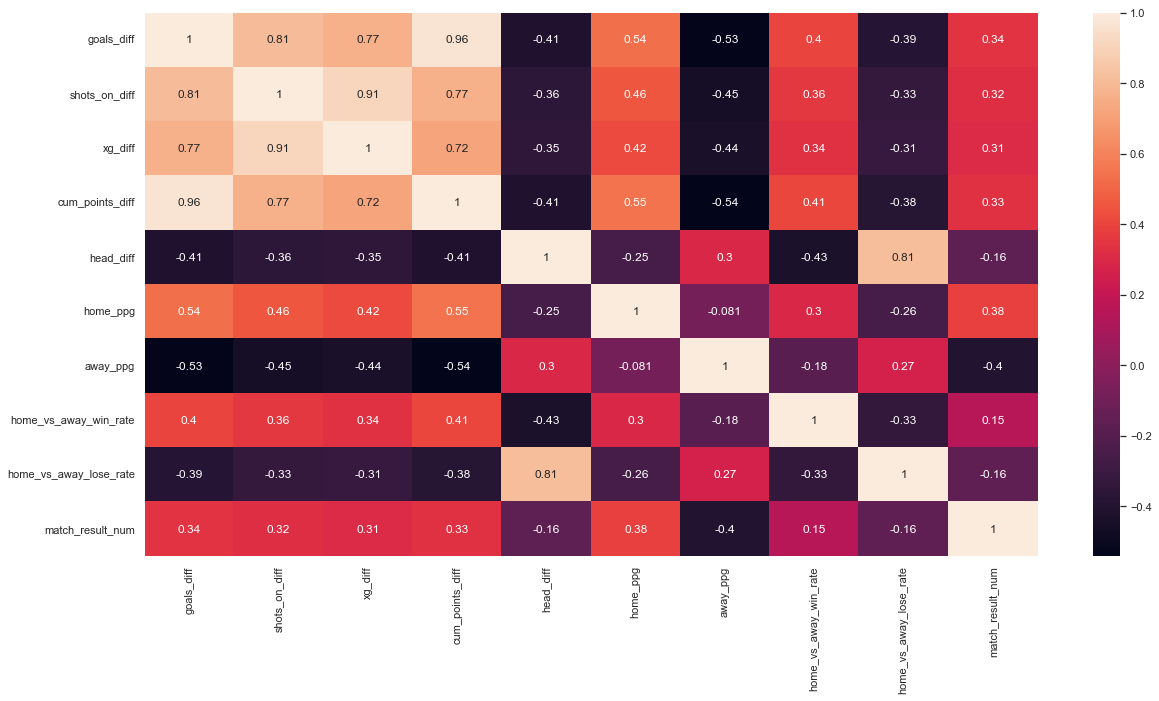

In [81]:
plt.figure(figsize=(20,10)) 
sns.heatmap(epl_15_20_matches_top_features.corr(), annot= True)

In [82]:
X = epl_15_20_matches_top_features.drop('match_result_num',axis=1)
y = epl_15_20_matches_top_features['match_result_num']

In [83]:
from sklearn.preprocessing import scale

for col in top_features4:
    X[col] = scale(X[col])

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [86]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2280 entries, 0 to 2279
Data columns (total 9 columns):
goals_diff                2280 non-null float64
shots_on_diff             2280 non-null float64
xg_diff                   2280 non-null float64
cum_points_diff           2280 non-null float64
head_diff                 2280 non-null float64
home_ppg                  2280 non-null float64
away_ppg                  2280 non-null float64
home_vs_away_win_rate     2280 non-null float64
home_vs_away_lose_rate    2280 non-null float64
dtypes: float64(9)
memory usage: 178.1 KB


In [87]:
from xgboost import XGBClassifier

In [88]:
# model = XGBClassifier()
# model.fit(X_train, y_train)

In [89]:
from sklearn.linear_model import LogisticRegression

In [90]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [91]:
predictions = model.predict(X_test)

In [92]:
from sklearn.metrics import classification_report

In [93]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          -1       0.60      0.67      0.64       122
           0       0.14      0.02      0.03        62
           1       0.65      0.82      0.73       158

    accuracy                           0.62       342
   macro avg       0.47      0.50      0.46       342
weighted avg       0.54      0.62      0.57       342



In [94]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [95]:
confusion_matrix(y_test,predictions)

array([[ 82,   3,  37],
       [ 29,   1,  32],
       [ 25,   3, 130]], dtype=int64)

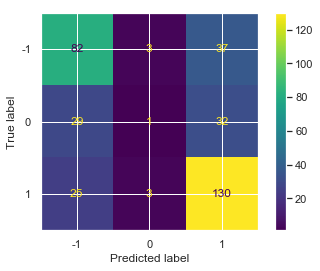

In [96]:
plot_confusion_matrix(model,X_test,y_test)

In [97]:
pd.DataFrame(index=X.columns,data=model.coef_[0],columns=['Feature Importance'])

,Feature Importance
goals_diff,-0.050327
shots_on_diff,-0.070404
xg_diff,-0.146461
cum_points_diff,0.391826
head_diff,-0.075345
home_ppg,-0.709476
away_ppg,0.752967
home_vs_away_win_rate,0.049291
home_vs_away_lose_rate,0.043921
